# **Week 2**
### Josh Winnes
### Topics in Data Science
### September 10, 2024
##### (Due: Tuesday, September 17)

---
---

## **Data Setup**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

import sys

# Specify the path to the directory containing your script
script_directory = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages'
sys.path.append(script_directory)

# Now you can import your script
import dhs_util
from dhs_util import * 

os.chdir('/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data')
df = pd.read_csv('dhs_service_records_synthesized_final.csv')

df = dhs_preprocessing(df)
df, service_map = add_service_label(df)
df = add_age_bin(df)

recipient = get_recipient_attribute(df)

/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages/dhs_util.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(


In [2]:
df.head()

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
0,1626,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),January,S01,0-9
1,1626,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),February,S01,0-9
2,1626,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),March,S01,0-9
3,1626,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),April,S01,0-9
4,1626,2021-05-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),May,S01,0-9


In [3]:
recipient.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,1,12,1,2021-01-31,2021-12-31,12,12,13,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S12,10-19
12,2,1,1,2021-02-28,2021-02-28,1,1,70,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,99~Unknown,S12,70-79
13,3,11,1,2021-02-28,2021-12-31,11,11,29,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S12,20-29
24,4,4,1,2021-03-31,2021-12-31,4,4,4,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S12,0-9
28,5,12,1,2021-01-31,2021-12-31,12,12,40,1~Male,2~Black/African American,2~Not Hispanic/Latinx,2~Married,UNDERGRAD~Some College,S12,40-49


---
---

## **In Class Exercises**

### ***Tuesday, September 10, 2024***

### Exercise 1: How many recipients receive services every month in the year? 

In [4]:
recipient.query("distinct_month == 12 and num_service > 0").count()

id                  421900
num_service         421900
distinct_service    421900
first_date          421900
last_date           421900
num_month           421900
distinct_month      421900
age                 421900
gender              421900
race                421900
ethnicity           421900
marital             421900
education           421900
serv                421900
age_bin             421900
dtype: int64

We see that **421,900** recipients receive at least 1 service in every month.

### Exercise 2: What is the average number of services a recipient use? 

In [5]:
recipient['num_service'].mean()

13.331111523251261

Recipients use, on average, **13.331** services

### Exercise 3: If we remove the recipients who uses only one service in the year, what are the answers to the above questions?

In [6]:
recipient_more_than_one = recipient.query("num_service != 1").reset_index()
recipient_more_than_one.head()

,index,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,0,1,12,1,2021-01-31,2021-12-31,12,12,13,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S12,10-19
1,13,3,11,1,2021-02-28,2021-12-31,11,11,29,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S12,20-29
2,24,4,4,1,2021-03-31,2021-12-31,4,4,4,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S12,0-9
3,28,5,12,1,2021-01-31,2021-12-31,12,12,40,1~Male,2~Black/African American,2~Not Hispanic/Latinx,2~Married,UNDERGRAD~Some College,S12,40-49
4,40,6,24,3,2021-01-31,2021-12-31,24,12,71,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S09,70-79


In [7]:
recipient_more_than_one.query("distinct_month == 12 and num_service > 0").count()

index               421900
id                  421900
num_service         421900
distinct_service    421900
first_date          421900
last_date           421900
num_month           421900
distinct_month      421900
age                 421900
gender              421900
race                421900
ethnicity           421900
marital             421900
education           421900
serv                421900
age_bin             421900
dtype: int64

There are still **421,900** recipients who receive services every month, which makes sense because if they receive service every month, then they would have more than 1 service in the year and would not have been dropped.

In [8]:
recipient_more_than_one['num_service'].mean()

13.631203741194396

The mean jumped slightly to **13.631** services per recipient when we ignore the recipients who only received 1 service.

### Exercise 4: From all the plots, can we conclude that there is little difference in the number of services used between different age/gender/race groups?

---

### ***Thursday, September 12, 2024***

### Exercise 1: Build you own module of helper functions, store in file, and import into your main notebook for use

In [9]:
import week2_util as util

### Exercise 2: Think about the behavior cohorts
- can we conclude that income services combined with other services helps recipients reduce their reliance on income support overtime?
- does the conclusion make sense? i.e., can the conclusions be reasonably explained by cross validation with other data view? 
 

Honestly, I don't think that we can conclude that income services combined with other services helps recipients reduce their reliance on income support over time because it looks like the n

### Exercise 3: Check out pandas.crosstab https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html#pandas.crosstab , see if you can prodce a table with service as row and race and gender as columns 

---
---

## **Homework**

### Exercise 1
- Choose a pair or multiple behavior cohorts of recipients based on a set of behavior criteria that you think may be of importance (to the works done at DHS)
    - e.g., recipients who received mental health service (S14) vs. those who did not
    - e.g., recipients who received mental health service AND income support vs. those who received mental health support only (or the other way around) etc. 


In [10]:
for i in df['service'].unique(): print(i)

Children_Attending_Early_Childhood_Programs_Managed_by_DHS
Children_in_Care
Children_Receiving_Child_Welfare_Services
Children_Receiving_DHS_Funded_Out_of_School_Programs
Children_Receiving_Early_Intervention_Services
Families_Receiving_Child_Welfare_Services
Homeless_Population
Homicides
Individuals_Receiving_DHS_Services
Individuals_Receiving_Family_Strengthening_Programs
Individuals_Receiving_Homelessness_and_Housing_Services
Individuals_Receiving_Income_Supports
Individuals_Receiving_Intellectual_Disability_Services
Individuals_Receiving_Mental_Health_Services
Individuals_Receiving_Substance_Use_Disorder_Services
Involuntary_Commitments
Jail_Population
Mental_Health_Crises
Older_Adults_Receiving_Services
Overdoses
Parents_Receiving_Child_Welfare_Services
Suicides


Based on the options listed above, I want to investigate children receiving S02 and S18.

In [12]:
service_map

{'Children_Attending_Early_Childhood_Programs_Managed_by_DHS': 'S01',
 'Children_in_Care': 'S02',
 'Children_Receiving_Child_Welfare_Services': 'S03',
 'Children_Receiving_DHS_Funded_Out_of_School_Programs': 'S04',
 'Children_Receiving_Early_Intervention_Services': 'S05',
 'Families_Receiving_Child_Welfare_Services': 'S06',
 'Homeless_Population': 'S07',
 'Homicides': 'S08',
 'Individuals_Receiving_DHS_Services': 'S09',
 'Individuals_Receiving_Family_Strengthening_Programs': 'S10',
 'Individuals_Receiving_Homelessness_and_Housing_Services': 'S11',
 'Individuals_Receiving_Income_Supports': 'S12',
 'Individuals_Receiving_Intellectual_Disability_Services': 'S13',
 'Individuals_Receiving_Mental_Health_Services': 'S14',
 'Individuals_Receiving_Substance_Use_Disorder_Services': 'S15',
 'Involuntary_Commitments': 'S16',
 'Jail_Population': 'S17',
 'Mental_Health_Crises': 'S18',
 'Older_Adults_Receiving_Services': 'S19',
 'Overdoses': 'S20',
 'Parents_Receiving_Child_Welfare_Services': 'S21',


In [21]:
df.head()

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
0,1626,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),January,S01,0-9
1,1626,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),February,S01,0-9
2,1626,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),March,S01,0-9
3,1626,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),April,S01,0-9
4,1626,2021-05-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),May,S01,0-9


In [27]:
id_S02 = list(df.query("serv == 'S02'").id.drop_duplicates())
id_S18 = list(df.query("serv == 'S18'").id.drop_duplicates())

id_S02_and_S18 = list(set(id_S02) & set(id_218))
id_S02_only = set(id_S02).difference(set(id_S02_and_S18))
id_S18_only = set(id_S18).difference(set(id_S02_and_S18))


verify that the split didn't leave anyone behind

In [40]:
print(len(id_S18))
print(len(id_S02_and_S18)+len(id_S18_only))
print('all S18 accounted for')

print(len(id_S02))
print(len(id_S02_and_S18)+len(id_S02_only))
print('all S02 accounted for')

7245
7245
all S18 accounted for
2237
2237
all S02 accounted for


In [53]:
cohort_S02_only_services = df[df['id'].isin(id_S02_only)]
cohort_S02_and_S18_services = df[df['id'].isin(id_S02_and_S18)]
cohort_S18_only_services = df[df['id'].isin(id_S18_only)]

In [54]:
cohort_S02_only_recipients = get_recipient_attribute(cohort_S02_only_services)
cohort_S02_and_S18_recipients = get_recipient_attribute(cohort_S02_and_S18_services)
cohort_S18_only_recipients = get_recipient_attribute(cohort_S18_only_services)

/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages/dhs_util.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(
/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages/dhs_util.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(
/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics 

In [55]:
cohort_S18_only_recipients.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,263,38,5,2021-01-31,2021-12-31,38,12,9,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S09,0-9
38,349,50,6,2021-01-31,2021-12-31,50,12,38,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,UNDERGRAD~Some College,S09,30-39
88,376,31,6,2021-01-31,2021-12-31,31,12,31,2~Female,2~Black/African American,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S09,30-39
119,381,34,4,2021-01-31,2021-12-31,34,12,62,2~Female,2~Black/African American,2~Not Hispanic/Latinx,2~Married,GED~High School Diploma/GED Completed,S09,60-69
153,395,46,5,2021-01-31,2021-12-31,46,12,27,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S09,20-29


In [56]:
cohort_S02_and_S18_recipients.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,639,61,6,2021-01-31,2021-12-31,61,12,16,2~Female,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,9-12~High School (grade 9-12),S02,10-19
61,3283,46,7,2021-01-31,2021-12-31,46,12,15,1~Male,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S02,10-19
107,3891,53,7,2021-01-31,2021-12-31,53,12,15,2~Female,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S02,10-19
160,7863,54,6,2021-01-31,2021-12-31,54,12,13,1~Male,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,9-12~High School (grade 9-12),S02,10-19
214,8544,42,6,2021-01-31,2021-12-31,42,12,9,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S02,0-9


In [57]:
cohort_S18_only_recipients.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,263,38,5,2021-01-31,2021-12-31,38,12,9,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S09,0-9
38,349,50,6,2021-01-31,2021-12-31,50,12,38,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,UNDERGRAD~Some College,S09,30-39
88,376,31,6,2021-01-31,2021-12-31,31,12,31,2~Female,2~Black/African American,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S09,30-39
119,381,34,4,2021-01-31,2021-12-31,34,12,62,2~Female,2~Black/African American,2~Not Hispanic/Latinx,2~Married,GED~High School Diploma/GED Completed,S09,60-69
153,395,46,5,2021-01-31,2021-12-31,46,12,27,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S09,20-29


In [63]:
df_temp = cohort_S02_and_S18_services.groupby(["id","serv"]).agg(
    num_serv = ('service', 'nunique') # this will be 1 or 0, "service" is categorical 
).reset_index()

df_serv = df_temp.pivot_table(
    values='num_serv', 
    index=["id"], columns="serv", aggfunc=np.sum
    ).reset_index()

df_serv.head(30)

/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_88204/2176552638.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp = cohort_S02_and_S18_services.groupby(["id","serv"]).agg(
/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_88204/2176552638.py:5: FutureWarning: The provided callable <function sum at 0x106808900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_serv = df_temp.pivot_table(


serv,id,S01,S03,S04,S05,S02,S06,S07,S08,S09,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_serv.iloc[:,1:22].sum()

serv
S01      0
S03    124
S04      3
S05     10
S02    125
S06      0
S07     13
S08      0
S09    125
S10      6
S11     16
S12    120
S13      8
S14    125
S15      2
S16     20
S17      0
S18    125
S19      0
S20      0
S21      1
dtype: int64

In [65]:
df_serv.iloc[:,1:23].corr(method="spearman")

serv,S01,S03,S04,S05,S02,S06,S07,S08,S09,S10,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
serv,,,,,,,,,,,,,,,,,,,,,
S01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S03,NaN,1.000000,0.155525,0.283951,0.995991,NaN,0.298844,NaN,0.995991,0.219946,...,0.253973,0.995991,0.126986,0.401571,NaN,0.995991,NaN,NaN,0.089792,NaN
S04,NaN,0.155525,1.000000,-0.000010,0.154902,NaN,-0.000012,NaN,0.154902,-0.000008,...,0.204117,0.154902,-0.000005,-0.000015,NaN,0.154902,NaN,NaN,-0.000003,NaN
S05,NaN,0.283951,-0.000010,1.000000,0.282812,NaN,0.087686,NaN,0.282812,-0.000015,...,-0.000017,0.282812,-0.000008,0.070686,NaN,0.282812,NaN,NaN,-0.000006,NaN
S02,NaN,0.995991,0.154902,0.282812,1.000000,NaN,0.322456,NaN,1.000000,0.219065,...,0.252954,1.000000,0.126477,0.399961,NaN,1.000000,NaN,NaN,0.089432,NaN
S06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S07,NaN,0.298844,-0.000012,0.087686,0.322456,NaN,1.000000,NaN,0.322456,0.113213,...,-0.000019,0.322456,-0.000010,0.124008,NaN,0.322456,NaN,NaN,-0.000007,NaN
S08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S09,NaN,0.995991,0.154902,0.282812,1.000000,NaN,0.322456,NaN,1.000000,0.219065,...,0.252954,1.000000,0.126477,0.399961,NaN,1.000000,NaN,NaN,0.089432,NaN


<Axes: xlabel='serv', ylabel='serv'>

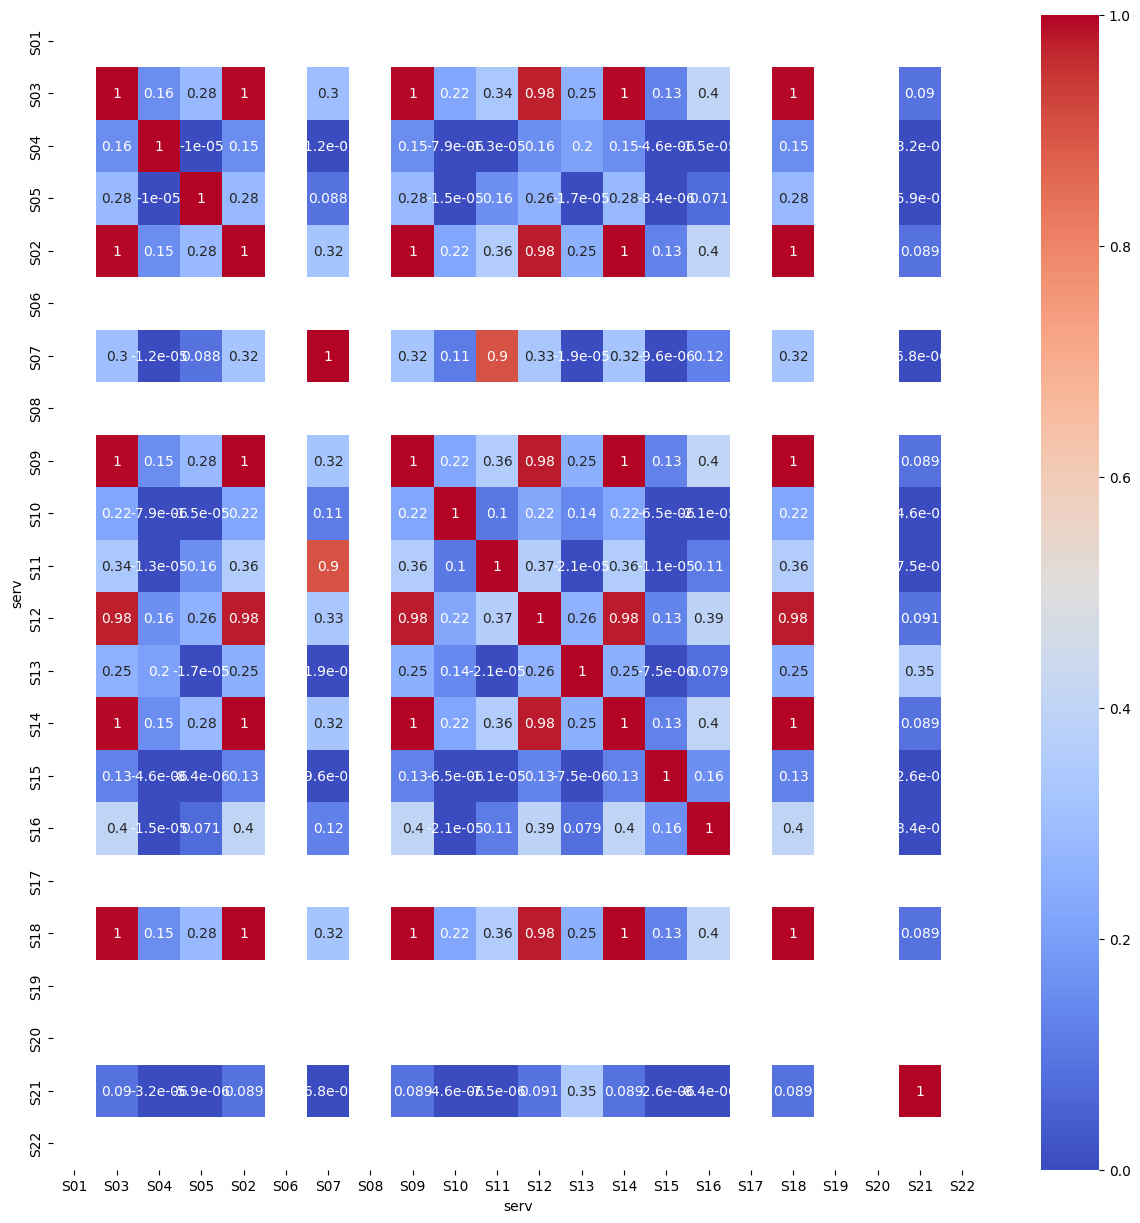

In [66]:
plt.figure(figsize=(15,15)) 
sns.heatmap(df_serv.iloc[:,1:23].corr(),annot=True, cmap='coolwarm')